<a href="https://colab.research.google.com/github/chsvhemanth/chsvhemanth/blob/main/HEART%20DISEASE%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')

In [3]:
data


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
data.shape

(270, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [7]:
data.tail()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [8]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [9]:
data["Age"].value_counts()

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: Age, dtype: int64

In [10]:
data["BP"].value_counts()

120    34
130    31
140    30
110    17
150    17
160    11
125    10
138     9
112     9
128     9
118     7
132     6
135     6
108     6
124     5
145     5
134     4
100     4
152     4
180     3
136     3
115     3
105     3
126     3
122     3
142     3
94      2
102     2
178     2
170     2
104     1
200     1
155     1
101     1
129     1
123     1
192     1
117     1
158     1
146     1
156     1
165     1
174     1
144     1
106     1
148     1
172     1
Name: BP, dtype: int64

In [11]:
print('The highest BP was of:',data['BP'].max())
print('The lowest BP was of:',data['BP'].min())
print('The average BP in the data:',data['BP'].mean())

The highest BP was of: 200
The lowest BP was of: 94
The average BP in the data: 131.34444444444443


In [12]:
print('The highest Cholesterol was of:',data['Cholesterol'].max())
print('The lowest cholesterol was of:',data['Cholesterol'].min())
print('The average cholesterol in the data:',data['Cholesterol'].mean())

The highest Cholesterol was of: 564
The lowest cholesterol was of: 126
The average cholesterol in the data: 249.65925925925927


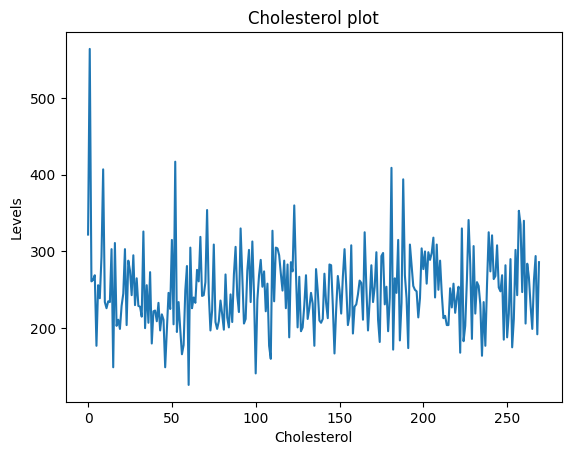

In [13]:
import matplotlib.pyplot as plt
plt.plot(data['Cholesterol'])
plt.xlabel("Cholesterol")
plt.ylabel("Levels")
plt.title("Cholesterol plot")
plt.show()

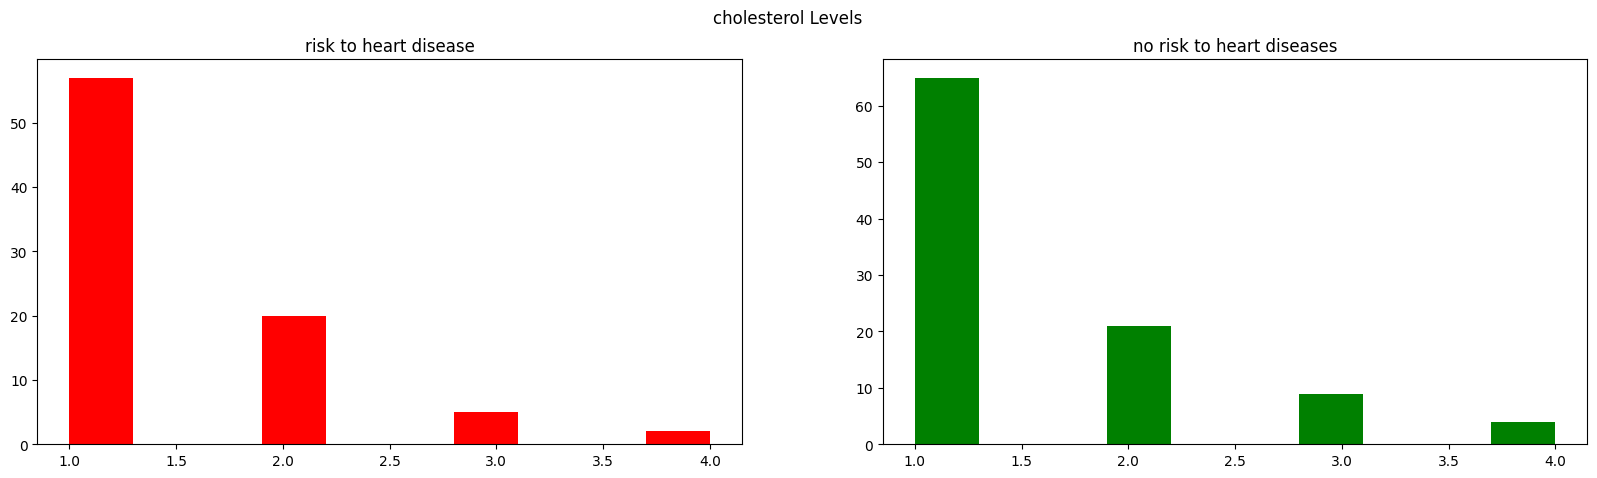

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
data_len=data[data['Heart Disease']=='Presence']['Cholesterol'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('risk to heart disease')

data_len=data[data['Heart Disease']=='Absence']['Cholesterol'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('no risk to heart diseases')

fig.suptitle('cholesterol Levels')
plt.show()

In [15]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 270, dtype: bool

In [16]:
data[data.duplicated()]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [17]:
newdata=data.drop_duplicates()

In [18]:
newdata

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [19]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [20]:
data[1:5]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [21]:

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression

In [22]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Heart Disease'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Heart Disease']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(189, 189, 81, 81)

In [23]:
from sklearn.linear_model import LogisticRegression,LinearRegression
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression is 0.8024691358024691
Classification Report:
               precision    recall  f1-score   support

     Absence       0.81      0.84      0.83        45
    Presence       0.79      0.75      0.77        36

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81



In [24]:
prediction3= model.predict(test_X)
conf_matrix =confusion_matrix(test_Y,prediction3)
print("confusion matrix :\n",conf_matrix)

confusion matrix :
 [[38  7]
 [ 9 27]]


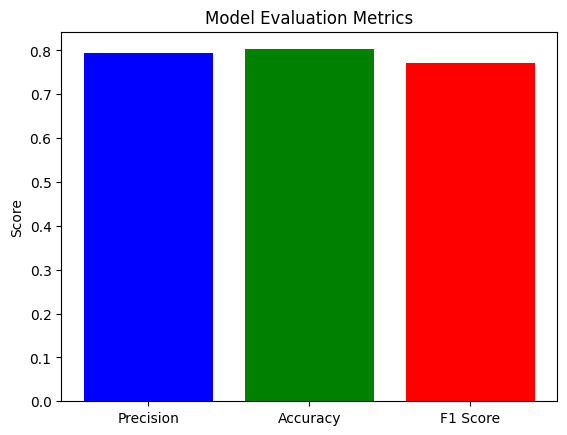

In [25]:
from sklearn.metrics import precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_Y_encoded = label_encoder.fit_transform(test_Y)

predictions = model.predict(test_X)


predictions_encoded = label_encoder.transform(predictions)


precision = precision_score(test_Y_encoded, predictions_encoded)
accuracy = accuracy_score(test_Y_encoded, predictions_encoded)
f1 = f1_score(test_Y_encoded, predictions_encoded)


labels = ['Precision', 'Accuracy', 'F1 Score']
scores = [precision, accuracy, f1]

plt.bar(labels, scores, color=['blue', 'green', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()
